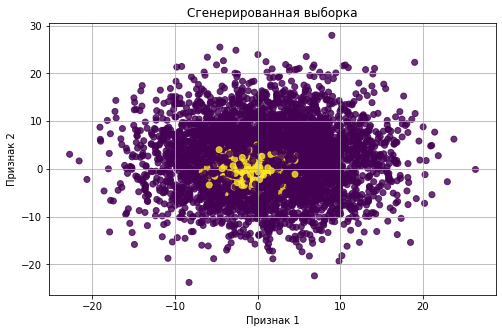

In [1]:
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np

Xmb,vmb = make_blobs(
    n_samples=(4000,500),  # количество точек в каждом кластере
    centers=[[1, 2], [-1, 0]],  # центры кластеров
    cluster_std=[7.0,2],  # стандартные отклонения по кластерам
    random_state=22  # зерно случайности
)


plt.figure(figsize=(8, 5))  # создаем фигуру
plt.scatter(Xmb[:, 0], Xmb[:, 1], c=vmb, alpha=0.8, )  # рисуем точки
plt.grid()  # добавление сетки на график
plt.xlabel('Признак 1'), plt.ylabel('Признак 2')
plt.title('Сгенерированная выборка')
plt.show()  # печатаем график

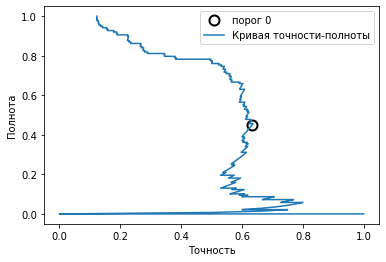

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Xmb_train, Xmb_test, vbm_train, vbm_test = train_test_split(Xmb,vmb,random_state=0)
svc = SVC(gamma=.05).fit(Xmb_train,vbm_train)

precision, recall, thresholds = precision_recall_curve(vbm_test, svc.decision_function(Xmb_test))

close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o', markersize=10,label='порог 0', fillstyle="none",c='k', mew=2)
plt.plot(precision,recall,label="Кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best");

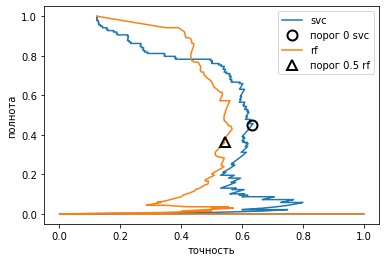

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2).fit(Xmb_train, vbm_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(vbm_test, rf.predict_proba(Xmb_test)[:,1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10, label="порог 0 svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf], '^', c='k', markersize=10, label="порог 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("точность")
plt.ylabel("полнота")
plt.legend(loc="best")

In [4]:
from sklearn.metrics import f1_score
print('f1-мера random forest:{:.3f}'.format(f1_score(vbm_test, rf.predict(Xmb_test))))
print('f1-мера svc:{:.3f}'.format(f1_score(vbm_test, svc.predict(Xmb_test))))

f1-мера random forest:0.421
f1-мера svc:0.525


In [5]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(vbm_test, rf.predict_proba(Xmb_test)[:,1])
ap_svc = average_precision_score(vbm_test, svc.decision_function(Xmb_test))
print('Средняя точность random forest: {:.3f}'.format(ap_rf))
print('Средняя точность svc: {:.3f}'.format(ap_svc))

Средняя точность random forest: 0.471
Средняя точность svc: 0.520
